In [1]:
import xarray as xr 
import matplotlib.pyplot as plt 
import numpy as np 

import cartopy.crs as ccrs 
import cartopy.mpl.ticker as cticker 
from cartopy.util import add_cyclic_point

In [2]:
def label_latlon(ax,lons,lats):
    
    # Longitude labels
    ax.set_xticks(lons, crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    ax.set_yticks(lats, crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

### RMM Index

First 2 PCs (daily) of Combined EOF (variables including OLR, u850, and u200)

'/homes/khuang8/clim680/MJO_PC_INDEX.1979-2013.nc'


In [3]:
file_rmm='/homes/khuang8/clim680/MJO_PC_INDEX.1979-2013.nc'
ds_rmm=xr.open_dataset(file_rmm)
ds_rmm

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * var        (var) int64 1 2 3
  * eof        (eof) int64 1 2
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
Data variables:
    ceof       (var, eof, lon) float64 ...
    PC1        (time) float64 ...
    PC2        (time) float64 ...
    MJO_INDEX  (time) float64 ...

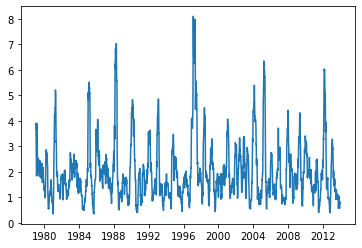

In [4]:
plt.plot(ds_rmm['time'],ds_rmm['MJO_INDEX'])

## Define Convection Active MJO of RMM1 and RMM2

Use 'xarray.where' function

In [5]:
ds_MJO=ds_rmm.where(ds_rmm['MJO_INDEX']>1)
ds_MJO

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * var        (var) int64 1 2 3
  * eof        (eof) int64 1 2
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
Data variables:
    ceof       (var, eof, lon, time) float64 0.013 0.013 0.013 ... nan nan nan
    PC1        (time) float64 -0.9873 -1.4 -1.68 -1.808 ... nan nan nan nan
    PC2        (time) float64 1.297 1.453 1.533 1.423 1.253 ... nan nan nan nan
    MJO_INDEX  (time) float64 3.889 3.867 3.825 3.77 3.713 ... nan nan nan nan

In [6]:
ds_rmm1 = ds_MJO.where(ds_MJO['PC1']>1)
ds_rmm1

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * var        (var) int64 1 2 3
  * eof        (eof) int64 1 2
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
Data variables:
    ceof       (var, eof, lon, time) float64 nan nan nan nan ... nan nan nan nan
    PC1        (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    PC2        (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MJO_INDEX  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [7]:
ds_rmm2 = ds_MJO.where(ds_MJO['PC2']>1)
ds_rmm2

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * var        (var) int64 1 2 3
  * eof        (eof) int64 1 2
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
Data variables:
    ceof       (var, eof, lon, time) float64 0.013 0.013 0.013 ... nan nan nan
    PC1        (time) float64 -0.9873 -1.4 -1.68 -1.808 ... nan nan nan nan
    PC2        (time) float64 1.297 1.453 1.533 1.423 1.253 ... nan nan nan nan
    MJO_INDEX  (time) float64 3.889 3.867 3.825 3.77 3.713 ... nan nan nan nan

In [8]:
ds_no_MJO=ds_rmm.where(ds_rmm['MJO_INDEX']<1)
ds_no_MJO

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * var        (var) int64 1 2 3
  * eof        (eof) int64 1 2
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
Data variables:
    ceof       (var, eof, lon, time) float64 nan nan nan ... 0.05833 0.05833
    PC1        (time) float64 nan nan nan nan ... 0.2634 0.1445 -0.2123 -0.2606
    PC2        (time) float64 nan nan nan nan nan ... 1.049 0.8893 0.6106 0.3947
    MJO_INDEX  (time) float64 nan nan nan nan nan ... 0.7775 0.7741 0.775 0.7764

In [9]:
print('No MJO: ',ds_no_MJO['MJO_INDEX'].count(dim='time').values)
print('MJO RMM1: ',ds_rmm1['MJO_INDEX'].count(dim='time').values)
print('MJO RMM2: ',ds_rmm2['MJO_INDEX'].count(dim='time').values)

No MJO:  2027
MJO RMM1:  1837
MJO RMM2:  1949


### OLR Data
NOAA Daily OLR '/shared/ccsm4/khuang/obs/NOAA-OLR/NOAA.OLR.daily.mean.1979-2019.nc'

In [10]:
file='/shared/ccsm4/khuang/obs/NOAA-OLR/NOAA.OLR.daily.mean.1979-2019.nc'
ds_olr=xr.open_dataset(file)
ds_olr

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 16650)
Coordinates:
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (time, lat, lon) float32 ...

In [11]:
ds_olr=ds_olr.sel(time=slice(ds_rmm['time'][0], ds_rmm['time'][-1]))
ds_olr

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 12784)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (time, lat, lon) float32 ...

### Make anomalies of our OLR data

`goupby`

In [12]:
ds_olrclm    = ds_olr.groupby('time.dayofyear').mean()
ds_anoms     = ds_olr.groupby('time.dayofyear')-ds_olrclm
ds_anoms

<xarray.Dataset>
Dimensions:    (lat: 73, lon: 144, time: 12784)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364 365
Data variables:
    olr        (time, lat, lon) float32 -3.2585602 -3.2585602 ... 0.040283203

In [13]:
ds_rmm1['MJO_INDEX'].dropna(dim='time')['time']

<xarray.DataArray 'time' (time: 1837)>
array(['1979-02-13T00:00:00.000000000', '1979-02-15T00:00:00.000000000',
       '1979-03-08T00:00:00.000000000', ..., '2013-06-16T00:00:00.000000000',
       '2013-07-13T00:00:00.000000000', '2013-07-14T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-02-13 1979-02-15 ... 2013-07-14
Attributes:
    long_name:      Time
    actual_range:   [1528872. 1928448.]
    delta_t:        0000-00-01 00:00:00
    standard_name:  time
    axis:           T

In [14]:
rmm1_OLR = ds_anoms.sel(time=ds_rmm1['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
rmm1_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 -0.081027545 -0.081027545 ... 0.3011029

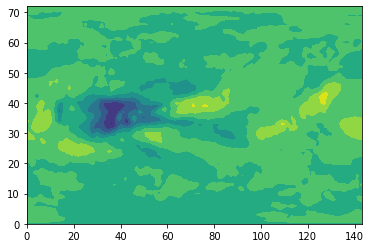

In [15]:
plt.contourf(rmm1_OLR['olr'])

In [16]:
ds_rmm2['MJO_INDEX'].dropna(dim='time')['time']

<xarray.DataArray 'time' (time: 1949)>
array(['1979-01-01T00:00:00.000000000', '1979-01-02T00:00:00.000000000',
       '1979-01-03T00:00:00.000000000', ..., '2013-09-30T00:00:00.000000000',
       '2013-10-01T00:00:00.000000000', '2013-10-03T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-10-03
Attributes:
    long_name:      Time
    actual_range:   [1528872. 1928448.]
    delta_t:        0000-00-01 00:00:00
    standard_name:  time
    axis:           T

In [17]:
rmm2_OLR = ds_anoms.sel(time=ds_rmm2['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
rmm2_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 0.38875112 0.38875112 ... -0.07097999

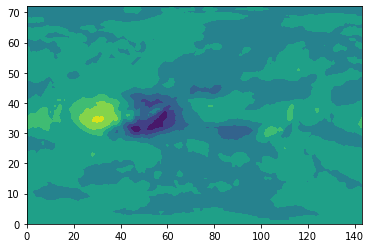

In [18]:
plt.contourf(rmm2_OLR['olr'])

In [19]:
ds_no_MJO['MJO_INDEX'].dropna(dim='time')['time']

<xarray.DataArray 'time' (time: 2027)>
array(['1980-01-13T00:00:00.000000000', '1980-01-14T00:00:00.000000000',
       '1980-01-15T00:00:00.000000000', ..., '2013-12-29T00:00:00.000000000',
       '2013-12-30T00:00:00.000000000', '2013-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-13 1980-01-14 ... 2013-12-31
Attributes:
    long_name:      Time
    actual_range:   [1528872. 1928448.]
    delta_t:        0000-00-01 00:00:00
    standard_name:  time
    axis:           T

In [20]:
no_MJO_OLR = ds_anoms.sel(time=ds_no_MJO['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
no_MJO_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 0.88085705 0.88085705 ... 0.895499 0.895499

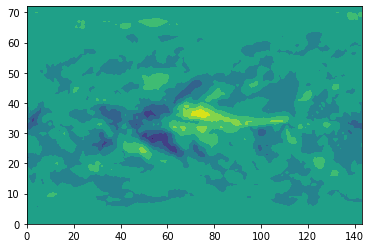

In [21]:
plt.contourf(no_MJO_OLR['olr'])

In [22]:
comp_olr=[no_MJO_OLR,
          rmm1_OLR,
          rmm2_OLR]
comp_olr

[<xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144)
 Coordinates:
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
 Data variables:
     olr      (lat, lon) float32 0.88085705 0.88085705 ... 0.895499 0.895499,
 <xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144)
 Coordinates:
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
 Data variables:
     olr      (lat, lon) float32 -0.081027545 -0.081027545 ... 0.3011029,
 <xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144)
 Coordinates:
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
 Data variables:
     olr      (lat, lon) float32 0.38875112 0.38875112 ... -0.07097999]

In [23]:
counts=[ds_no_MJO['MJO_INDEX'].count(dim='time').values,
        ds_rmm1['MJO_INDEX'].count(dim='time').values,
        ds_rmm2['MJO_INDEX'].count(dim='time').values]
counts

[array(2027), array(1837), array(1949)]

### 3-panel map of No-MJO, RMM1, and RMM2 OLR Composite

Text(0.5, 0.98, 'Composite OLR Anomalies during MJO')

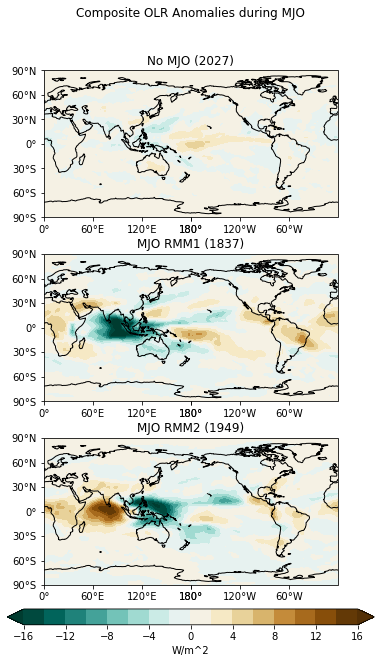

In [24]:
clevs=np.arange(-16,18,2)
labels=['No MJO','MJO RMM1','MJO RMM2']

fig,axs = plt.subplots(nrows=3,ncols=1, 
                       subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)},
                       figsize=(8.5,11))

axs=axs.flatten()

for i,phase in enumerate(comp_olr):
    
    data=comp_olr[i]['olr']
    
    data, lons=add_cyclic_point(data,coord=comp_olr[i]['lon'])
    
    cs=axs[i].contourf(lons,comp_olr[i]['lat'],data,clevs,
                       transform=ccrs.PlateCarree(),
                       cmap='BrBG_r',extend='both')
    
    label_latlon(axs[i],np.arange(-180,181,60),np.arange(-90,91,30))
    
    axs[i].set_title(labels[i]+' ('+str(counts[i])+')')
    
    axs[i].coastlines()

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.25, hspace=0.25)
    
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='W/m^2')

plt.suptitle('Composite OLR Anomalies during MJO')

### Significane Test

In [25]:
diff_olr=[rmm1_OLR-no_MJO_OLR,
          rmm2_OLR-no_MJO_OLR]
diff_olr

[<xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144)
 Coordinates:
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
 Data variables:
     olr      (lat, lon) float32 -0.9618846 -0.9618846 ... -0.5943961 -0.5943961,
 <xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144)
 Coordinates:
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
 Data variables:
     olr      (lat, lon) float32 -0.49210593 -0.49210593 ... -0.966479 -0.966479]

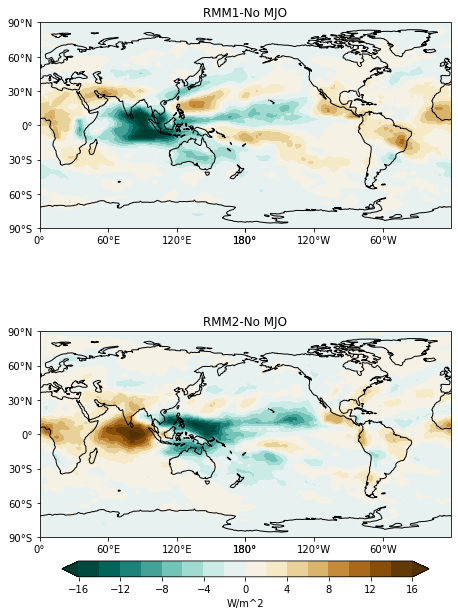

In [26]:
labels=['RMM1-No MJO',
        'RMM2-No MJO']

clevs=np.arange(-16,18,2)

fig,axs=plt.subplots(nrows=2,ncols=1,
                     subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)},
                     figsize=(8.5,11))

axs=axs.flatten()

for i,phase in enumerate(diff_olr): 
    data=diff_olr[i]['olr']
    data,lons=add_cyclic_point(data,coord=diff_olr[i]['lon'])
    cs=axs[i].contourf(lons,diff_olr[i]['lat'],data,clevs, 
                       transform=ccrs.PlateCarree(),
                       cmap='BrBG_r',extend='both')
    
    label_latlon(axs[i],np.arange(-180,181,60),np.arange(-90,91,30))
    
    axs[i].set_title(labels[i])
    axs[i].coastlines()
    
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.25, hspace=0.5)

cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='W/m^2')

In [27]:
p = 0.05

from scipy.stats import ttest_ind

rmm1_olr_vals=ds_anoms.sel(time=ds_rmm1['MJO_INDEX'].dropna(dim='time')['time'])
rmm2_olr_vals=ds_anoms.sel(time=ds_rmm2['MJO_INDEX'].dropna(dim='time')['time'])

no_olr_vals=ds_anoms.sel(time=ds_no_MJO['MJO_INDEX'].dropna(dim='time')['time'])

In [28]:
tstat1,pval1=ttest_ind(rmm1_olr_vals['olr'], 
                       no_olr_vals['olr'], 
                       equal_var = False)
pval1

array([[3.32757982e-03, 3.32757982e-03, 3.32757982e-03, ...,
        3.32757982e-03, 3.32757982e-03, 3.32757982e-03],
       [4.57202446e-02, 4.61638001e-02, 4.67270502e-02, ...,
        1.22960123e-01, 1.19330227e-01, 1.03782549e-01],
       [8.10765859e-01, 7.99612508e-01, 8.25156255e-01, ...,
        8.51723726e-01, 8.48797467e-01, 9.22142677e-01],
       ...,
       [2.03692552e-05, 1.04908669e-05, 7.48753925e-06, ...,
        9.70948757e-06, 4.43906397e-06, 2.22078029e-06],
       [1.44840460e-03, 1.15217415e-03, 9.74789039e-04, ...,
        1.67461053e-03, 1.26801885e-03, 9.94286202e-04],
       [4.89983366e-02, 4.89983366e-02, 4.89983366e-02, ...,
        4.89983366e-02, 4.89983366e-02, 4.89983366e-02]])

In [29]:
tstat2,pval2=ttest_ind(rmm2_olr_vals['olr'], 
                       no_olr_vals['olr'], 
                       equal_var = False)
pval2

array([[1.29742185e-01, 1.29742185e-01, 1.29742185e-01, ...,
        1.29742185e-01, 1.29742185e-01, 1.29742185e-01],
       [3.31012832e-01, 3.46676899e-01, 3.49612142e-01, ...,
        4.19881435e-01, 4.43296559e-01, 4.73469755e-01],
       [5.03593007e-01, 3.00566027e-01, 2.83390861e-01, ...,
        7.66927314e-01, 7.34556888e-01, 6.60003265e-01],
       ...,
       [1.45200145e-07, 8.68452152e-08, 6.37373176e-08, ...,
        1.09952981e-07, 5.98575945e-08, 3.72346914e-08],
       [6.45406346e-06, 5.57305925e-06, 4.92081625e-06, ...,
        6.72105633e-06, 5.63384405e-06, 5.11159692e-06],
       [1.37859210e-03, 1.37859210e-03, 1.37859210e-03, ...,
        1.37859210e-03, 1.37859210e-03, 1.37859210e-03]])

In [30]:
mask_diff1=diff_olr[0]['olr'].where(pval1<p)
mask_diff1

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[-0.9618846 , -0.9618846 , -0.9618846 , ..., -0.9618846 ,
        -0.9618846 , -0.9618846 ],
       [-0.6524447 , -0.6521888 , -0.65197814, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-1.2448899 , -1.2939495 , -1.3267084 , ..., -1.2669175 ,
        -1.3171655 , -1.3669423 ],
       [-0.90795445, -0.9308103 , -0.94922036, ..., -0.883922  ,
        -0.91031665, -0.9344981 ],
       [-0.5943961 , -0.5943961 , -0.5943961 , ..., -0.5943961 ,
        -0.5943961 , -0.5943961 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [31]:
mask_diff2=diff_olr[1]['olr'].where(pval2<p)
mask_diff2

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.5394344, -1.5736372, -1.6031299, ..., -1.5635016, -1.5981824,
        -1.6322794],
       [-1.3016095, -1.3165083, -1.3312035, ..., -1.2934341, -1.3095835,
        -1.321861 ],
       [-0.966479 , -0.966479 , -0.966479 , ..., -0.966479 , -0.966479 ,
        -0.966479 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

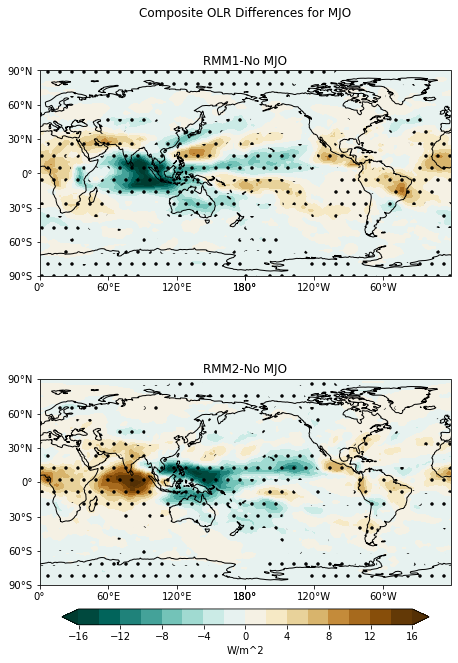

In [32]:
mask_diff=[mask_diff1,
           mask_diff2,]

labels=['RMM1-No MJO',
        'RMM2-No MJO']

clevs=np.arange(-16,18,2)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)},
                        figsize=(8.5,11))

axs=axs.flatten()

for i,phase in enumerate(diff_olr):
    data=diff_olr[i]['olr']
    # Add the cyclic point
    data,lons=add_cyclic_point(data,coord=diff_olr[i]['lon'])
    mask_data,lons=add_cyclic_point(mask_diff[i],coord=diff_olr[i]['lon'])
    # Contour plot
    cs=axs[i].contourf(lons,diff_olr[i]['lat'],data,clevs,
                       transform = ccrs.PlateCarree(),
                       cmap='BrBG_r',extend='both')
    
    axs[i].contourf(lons,diff_olr[0]['lat'],mask_data,[0,1],
                 transform = ccrs.PlateCarree(),colors='None',
                 hatches=['.',''],extend='both',alpha=0)
    
    label_latlon(axs[i],np.arange(-180,181,60),np.arange(-90,91,30))
    
    axs[i].set_title(labels[i])
    
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                        wspace=0.25, hspace=0.5)
        

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='W/m^2')

# Add a big title at the top
plt.suptitle('Composite OLR Differences for MJO')
plt.savefig('MJO_RMM1&2_compisite_ttest.png')

### Write data to a .nc file

In [33]:
ds_p1=xr.DataArray(pval1,
                   coords={'lat':ds_anoms['lat'],
                          'lon': ds_anoms['lon']},
                          dims=['lat','lon'])        
ds_p1=ds_p1.to_dataset(name='pvalue')
ds_p1

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    pvalue   (lat, lon) float64 0.003328 0.003328 0.003328 ... 0.049 0.049 0.049

In [34]:
ds_comp1=xr.merge([rmm1_OLR,ds_p1])
ds_comp1

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 -0.081027545 -0.081027545 ... 0.3011029
    pvalue   (lat, lon) float64 0.003328 0.003328 0.003328 ... 0.049 0.049 0.049

In [35]:
ds_comp1.to_netcdf('RMM1.OLR.composite.nc')

In [36]:
ds_p2=xr.DataArray(pval2,
                   coords={'lat':ds_anoms['lat'],
                          'lon': ds_anoms['lon']},
                          dims=['lat','lon'])        
ds_p2=ds_p2.to_dataset(name='pvalue')
ds_p2

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    pvalue   (lat, lon) float64 0.1297 0.1297 0.1297 ... 0.001379 0.001379

In [37]:
ds_comp2=xr.merge([rmm2_OLR,ds_p2])
ds_comp2

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 0.38875112 0.38875112 ... -0.07097999
    pvalue   (lat, lon) float64 0.1297 0.1297 0.1297 ... 0.001379 0.001379

In [38]:
ds_comp2.to_netcdf('RMM2.OLR.composite.nc')